In [28]:
!pip install torchviz

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

noise = np.random.rand(1, 10000) / 6

def np_noise(up_to_index):
  return noise[:, :up_to_index]

def torch_noise(up_to_index):
  return torch.from_numpy(noise[:, :up_to_index].astype(np.float32))

In [26]:
x = np.linspace(-1 * 5, 5, 1000)
x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
y = np.cos(x) + np_noise(1000)
y_torch = torch.add(torch.cos(x_torch), torch_noise(1000))
print(x.shape)
print(x_torch.shape)
print(y.shape)
print(y_torch.shape)

def run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000, np_func = np.cos, torch_func = torch.cos,
        model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)), learning_rate = 0.005,
        number_of_iterations = 10):
  x = np.linspace(-1 * train_bound, train_bound, number_of_train_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = np_func(x) + np_noise(number_of_train_points)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_train_points))

  optimizer = optim.Adam(model.parameters(), lr = learning_rate)
  loss_func = nn.MSELoss()

  losses = []
  for i in range(0, number_of_iterations):
    optimizer.zero_grad()
    loss = loss_func(model(x_torch), y_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  print(losses)

  x = np.linspace(-1 * test_bound, test_bound, number_of_test_points)
  x_torch = torch.unsqueeze(torch.from_numpy(x.astype(np.float32)), dim = 1)
  y = (np_func(x) + np_noise(number_of_test_points)).reshape(-1)
  y_torch = torch.add(torch_func(x_torch), torch_noise(number_of_test_points))

  plt.plot(x, y, 'g', label = 'Original Function')
  plt.plot(x_torch.detach().numpy().flatten(), model(x_torch).detach().numpy().flatten(), 'r', label = 'Predicted Function')
  plt.show()

(1000,)
torch.Size([1000, 1])
(1, 1000)
torch.Size([1000, 1000])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.3027604818344116, 0.6767471432685852, 0.3929448425769806, 0.388060599565506, 0.5120074152946472, 0.6054940223693848, 0.6069022417068481, 0.5375688672065735, 0.4445224404335022, 0.3682904541492462, 0.3307827413082123, 0.3327580690383911, 0.3583729565143585, 0.3855343163013458, 0.3971301317214966, 0.3873145580291748, 0.3610449731349945, 0.3292556703090668, 0.3030322790145874, 0.28910818696022034, 0.287917822599411, 0.2945464253425598, 0.3018331527709961, 0.30394574999809265, 0.29869458079338074, 0.28776225447654724, 0.27516379952430725, 0.2649778723716736, 0.2594682574272156, 0.25837886333465576, 0.2595288157463074, 0.26021185517311096, 0.2585783898830414, 0.2543300688266754, 0.2485293596982956, 0.24278610944747925, 0.238343745470047, 0.23554372787475586, 0.23387190699577332, 0.23243790864944458, 0.2305297702550888, 0.22793352603912354, 0.22489450871944427, 0.2218293398618698, 0.2190268486738205, 0.21653808653354645, 0.2142665982246399, 0.21210654079914093, 0.21000060439109802, 0.2079

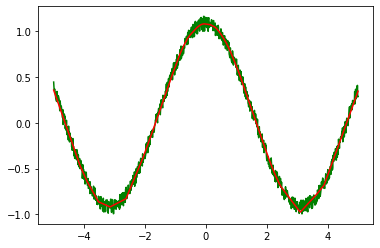

In [29]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([20, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0.527608335018158, 0.4109540581703186, 0.3657974302768707, 0.4015333652496338, 0.4177400469779968, 0.38063618540763855, 0.33271148800849915, 0.3115249276161194, 0.3197130858898163, 0.3327396810054779, 0.33118191361427307, 0.31629857420921326, 0.2995571196079254, 0.28878799080848694, 0.28444477915763855, 0.28395316004753113, 0.2848968803882599, 0.2847435176372528, 0.28107309341430664, 0.2734740972518921, 0.26507389545440674, 0.26032429933547974, 0.2607536315917969, 0.2630111575126648, 0.26222702860832214, 0.25705787539482117, 0.2505556344985962, 0.24623185396194458, 0.2446894645690918, 0.24393750727176666, 0.24216531217098236, 0.23912544548511505, 0.23546260595321655, 0.23174141347408295, 0.22833040356636047, 0.22581644356250763, 0.2241622507572174, 0.22228504717350006, 0.2192232459783554, 0.21538572013378143, 0.21211081743240356, 0.2099626213312149, 0.20813164114952087, 0.2057305872440338, 0.20280128717422485, 0.1998620182275772, 0.19712059199810028, 0.1945611983537674, 0.192176759243

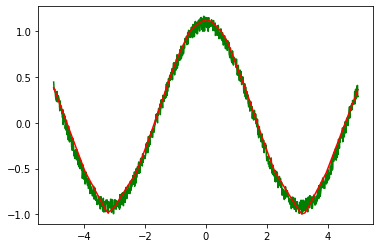

In [30]:
run(train_bound = 5, number_of_train_points = 20, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.239787220954895, 1.1581487655639648, 1.0816822052001953, 1.010448932647705, 0.9444616436958313, 0.8836724758148193, 0.8279641270637512, 0.7771397233009338, 0.7309213280677795, 0.6889503598213196, 0.6508066058158875, 0.6160362362861633, 0.5841915011405945, 0.5548697113990784, 0.5277482867240906, 0.5026001334190369, 0.4792885184288025, 0.4577522575855255, 0.4379817545413971, 0.4199948310852051, 0.4038183093070984, 0.38946816325187683, 0.3769395351409912, 0.3661993145942688, 0.35718053579330444, 0.34978151321411133, 0.3438696265220642, 0.3392849862575531, 0.33584868907928467, 0.33337166905403137, 0.3316650986671448, 0.3305475413799286, 0.3298512101173401, 0.3294289708137512, 0.32915639877319336, 0.32893040776252747, 0.3286706805229187, 0.3283160924911499, 0.32782337069511414, 0.32716381549835205, 0.32632166147232056, 0.32528987526893616, 0.32407137751579285, 0.3226723074913025, 0.32110700011253357, 0.3193909227848053, 0.31754544377326965, 0.31559357047080994, 0.31356367468833923, 0.311

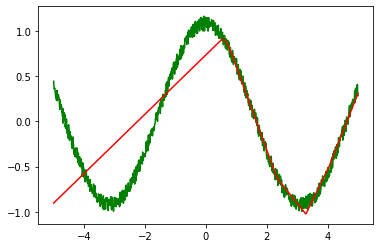

In [31]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0.3968464434146881, 0.38202086091041565, 0.3726061284542084, 0.364811509847641, 0.35654354095458984, 0.3473373055458069, 0.33847367763519287, 0.3314696252346039, 0.3249914348125458, 0.31855088472366333, 0.31243211030960083, 0.3066596984863281, 0.3010614812374115, 0.2960095703601837, 0.29108962416648865, 0.28626638650894165, 0.2814294695854187, 0.27637791633605957, 0.27119725942611694, 0.26618731021881104, 0.26155224442481995, 0.2567517161369324, 0.25184231996536255, 0.2464037835597992, 0.24100403487682343, 0.23561903834342957, 0.23016856610774994, 0.22470955550670624, 0.21924802660942078, 0.2137356400489807, 0.20810137689113617, 0.20235225558280945, 0.19655799865722656, 0.1907155066728592, 0.18472562730312347, 0.17857742309570312, 0.17236503958702087, 0.1661510020494461, 0.15986977517604828, 0.15345075726509094, 0.14694182574748993, 0.14060620963573456, 0.13442149758338928, 0.12818649411201477, 0.12197159230709076, 0.11590193957090378, 0.10995101928710938, 0.10406933724880219, 0.09827

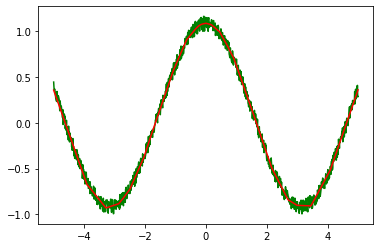

In [32]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 20), nn.ReLU(), nn.Linear(20, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

[0.7823272347450256, 0.5348165035247803, 0.4941358268260956, 0.5291804671287537, 0.5323472023010254, 0.4881639778614044, 0.4252570867538452, 0.37683382630348206, 0.35943111777305603, 0.3642275631427765]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


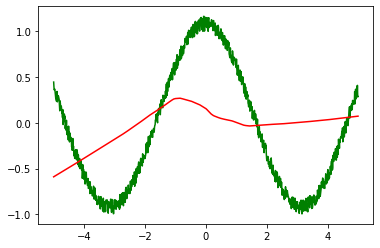

In [33]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[0.6269381642341614, 0.8835195899009705, 0.6163708567619324, 0.5827916860580444, 0.6907300353050232, 0.6609570980072021, 0.5566221475601196, 0.5285353064537048, 0.5861906409263611, 0.6182083487510681, 0.5767140984535217, 0.5207287073135376, 0.5153146982192993, 0.5515803098678589, 0.5698438286781311, 0.5453208684921265, 0.5109418034553528, 0.5052787661552429, 0.5255192518234253, 0.5377464890480042, 0.5250011682510376, 0.5045223832130432, 0.49929603934288025, 0.5090839266777039, 0.5156241655349731, 0.5090935230255127, 0.4980444014072418, 0.4943145513534546, 0.4978870451450348, 0.500235378742218, 0.49689850211143494, 0.49139872193336487, 0.4885089099407196, 0.488613486289978, 0.4889800250530243, 0.4874948263168335, 0.4843498468399048, 0.4813768267631531, 0.48027172684669495, 0.4805144965648651, 0.4796625077724457, 0.4767181873321533, 0.473889023065567, 0.47332021594047546, 0.47358953952789307, 0.47196754813194275, 0.4689529836177826, 0.467324435710907, 0.46733465790748596, 0.4664816856384

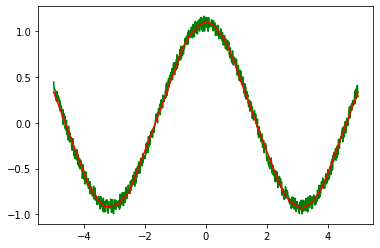

In [34]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.5096867084503174, 0.9212404489517212, 0.6375777125358582, 0.5401695370674133, 0.4979549050331116, 0.48336175084114075, 0.4963419437408447, 0.5237744450569153, 0.5461141467094421, 0.5464075803756714, 0.5166316628456116, 0.4621886610984802, 0.3989463150501251, 0.3448042571544647, 0.3116632401943207, 0.30124714970588684, 0.3061586916446686, 0.3154408931732178, 0.3207877278327942, 0.31938353180885315, 0.3127397894859314, 0.30358046293258667, 0.2932949960231781, 0.2815878093242645, 0.26814985275268555, 0.2543732225894928, 0.24326154589653015, 0.23760159313678741, 0.23794443905353546, 0.24198441207408905, 0.24588066339492798, 0.24657416343688965, 0.2433547079563141, 0.23767143487930298, 0.23165825009346008, 0.22666940093040466, 0.22284890711307526, 0.21977297961711884, 0.21729573607444763, 0.2157166451215744, 0.21522124111652374, 0.21530687808990479, 0.21488232910633087, 0.21302345395088196, 0.20968949794769287, 0.2057308703660965, 0.20219950377941132, 0.19960938394069672, 0.1977651864290

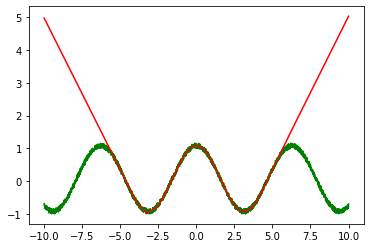

In [35]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np.cos, torch_func = torch.cos, model = nn.Sequential(nn.Linear(1, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.005, number_of_iterations = 1000)

In [36]:
def np_polynomial(x):
  return 2 * x ** 3 + 3 * x ** 2 + 4 * x + 1

def torch_polynomial(x):
  return torch.add(torch.add(torch.add(torch.mul(torch.pow(x, 3), 2), torch.mul(torch.pow(x, 2), 3)), torch.mul(x, 4)), 1)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12342.84765625, 12061.888671875, 11786.462890625, 11515.4638671875, 11247.48046875, 10981.125, 10715.1484375, 10448.556640625, 10180.630859375, 9910.923828125, 9639.23046875, 9365.5693359375, 9090.166015625, 8813.478515625, 8536.0185546875, 8258.4111328125, 7981.38671875, 7705.73974609375, 7432.30810546875, 7161.9541015625, 6895.51513671875, 6633.75146484375, 6377.3681640625, 6126.9208984375, 5882.81787109375, 5645.2421875, 5414.16552734375, 5189.3662109375, 4970.46435546875, 4756.98583984375, 4548.447265625, 4344.44140625, 4144.7255859375, 3949.274658203125, 3758.317626953125, 3572.33935546875, 3392.0537109375, 3218.352783203125, 3052.241455078125, 2894.78857421875, 2747.02734375, 2609.880126953125, 2484.123291015625, 2370.343017578125, 2268.90576171875, 2179.938720703125, 2103.32470703125, 2038.7052001953125, 1985.4945068359375, 1942.90185546875, 1909.9609375, 1885.5648193359375, 1868.508056640625, 1857.5279541015625, 1851.3516845703125, 1848.7396240234375, 1848.5250244140625, 1849.

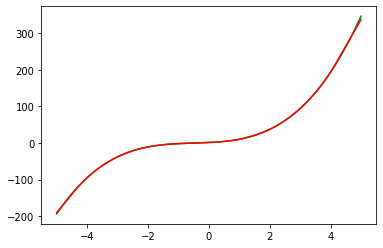

In [37]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[20282.00390625, 19892.5546875, 19504.7265625, 19116.36328125, 18725.1953125, 18329.357421875, 17927.47265625, 17518.548828125, 17102.345703125, 16678.228515625, 16245.8876953125, 15805.7626953125, 15358.33984375, 14904.177734375, 14443.73828125, 13977.75390625, 13507.32421875, 13033.5703125, 12557.6162109375, 12080.650390625, 11604.05859375, 11129.3603515625, 10658.099609375, 10191.68359375, 9731.6552734375, 9279.6640625, 8837.328125, 8406.1220703125, 7987.59765625, 7583.26123046875, 7194.05419921875, 6821.1845703125, 6465.23681640625, 6126.7705078125, 5806.09375, 5503.384765625, 5218.61181640625, 4951.619140625, 4702.15625, 4469.95166015625, 4254.703125, 4056.205078125, 3874.331298828125, 3708.8837890625, 3559.84228515625, 3427.1044921875, 3310.435546875, 3209.62158203125, 3124.158447265625, 3053.371826171875, 2996.352294921875, 2952.010986328125, 2919.022705078125, 2895.9150390625, 2881.118408203125, 2872.953125, 2869.721923828125, 2869.811767578125, 2871.77099609375, 2874.317138671

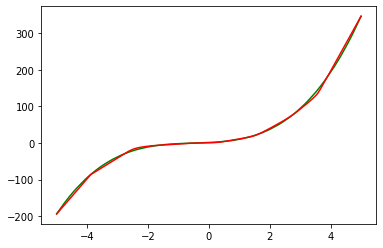

In [38]:
run(train_bound = 5, number_of_train_points = 10, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([5, 5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[32192.150390625, 31579.234375, 30972.35546875, 30368.025390625, 29763.494140625, 29156.16796875, 28543.57421875, 27924.16015625, 27295.990234375, 26657.501953125, 26008.0390625, 25347.51953125, 24675.57421875, 23992.38671875, 23298.3359375, 22594.07421875, 21880.802734375, 21159.828125, 20432.2265625, 19699.818359375, 18964.123046875, 18226.853515625, 17490.083984375, 16756.23828125, 16027.009765625, 15304.6328125, 14591.6728515625, 13890.64453125, 13203.5146484375, 12532.5966796875, 11880.12109375, 11248.271484375, 10639.0771484375, 10054.37109375, 9495.74609375, 8964.4453125, 8461.6474609375, 7988.154296875, 7544.017578125, 7129.26611328125, 6743.56494140625, 6386.28759765625, 6056.5966796875, 5753.4091796875, 5475.67041015625, 5222.3837890625, 4992.54736328125, 4785.19140625, 4599.35986328125, 4434.20166015625, 4288.90771484375, 4162.6533203125, 4054.54443359375, 3963.519287109375, 3888.515380859375, 3828.271484375, 3781.39501953125, 3746.359375, 3721.512451171875, 3705.15283203125

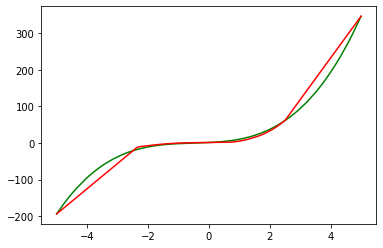

In [39]:
run(train_bound = 5, number_of_train_points = 5, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12987.3408203125, 12972.4443359375, 12957.8662109375, 12943.603515625, 12929.6484375, 12915.96484375, 12902.5068359375, 12889.2177734375, 12876.0634765625, 12863.001953125, 12850.0029296875, 12837.1181640625, 12824.3427734375, 12811.6650390625, 12799.06640625, 12786.53125, 12774.033203125, 12761.546875, 12749.046875, 12736.501953125, 12723.9111328125, 12711.23046875, 12698.400390625, 12685.3828125, 12672.154296875, 12658.6884765625, 12644.958984375, 12630.9443359375, 12616.623046875, 12601.9755859375, 12586.982421875, 12571.625, 12555.888671875, 12539.7568359375, 12523.2158203125, 12506.2509765625, 12488.8515625, 12471.0029296875, 12452.6943359375, 12433.9150390625, 12414.65625, 12394.9052734375, 12374.65234375, 12353.8916015625, 12332.6083984375, 12310.798828125, 12288.4521484375, 12265.5595703125, 12242.11328125, 12218.10546875, 12193.529296875, 12168.3759765625, 12142.6396484375, 12116.3134765625, 12089.388671875, 12061.8603515625, 12033.72265625, 12004.966796875, 11975.5888671875,

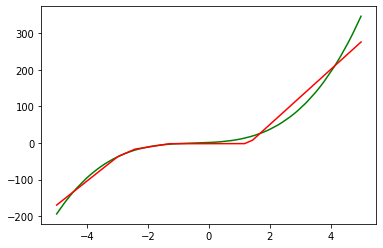

In [40]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([100, 100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12952.9853515625, 12939.6162109375, 12925.71875, 12911.3173828125, 12896.40625, 12880.9677734375, 12864.9736328125, 12848.38671875, 12831.1689453125, 12813.30078125, 12794.859375, 12775.5263671875, 12754.912109375, 12732.8408203125, 12709.142578125, 12683.6494140625, 12656.328125, 12626.73828125, 12595.2451171875, 12561.88671875, 12526.3232421875, 12488.3544921875, 12447.83203125, 12404.6220703125, 12358.5986328125, 12309.6318359375, 12257.5986328125, 12202.373046875, 12143.8291015625, 12081.8427734375, 12016.2939453125, 11947.0615234375, 11874.0263671875, 11797.072265625, 11716.0869140625, 11630.966796875, 11541.60546875, 11447.9072265625, 11349.78125, 11247.14453125, 11139.921875, 11028.046875, 10911.4609375, 10790.1201171875, 10663.990234375, 10533.05078125, 10397.291015625, 10256.7197265625, 10111.361328125, 9961.255859375, 9806.4580078125, 9647.046875, 9483.1201171875, 9314.7939453125, 9142.2099609375, 8965.525390625, 8784.931640625, 8600.62890625, 8412.8564453125, 8221.857421875

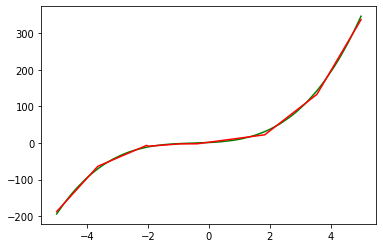

In [41]:
run(train_bound = 5, number_of_train_points = 100, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 5), nn.ReLU(), nn.Linear(5, 10), nn.ReLU(), nn.Linear(10, 1)),
    learning_rate = 0.01, number_of_iterations = 2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12381.4912109375, 12061.9482421875, 11747.5947265625, 11437.359375, 11130.056640625, 10824.34765625, 10519.0166015625, 10213.0517578125, 9905.6591796875, 9596.2666015625]


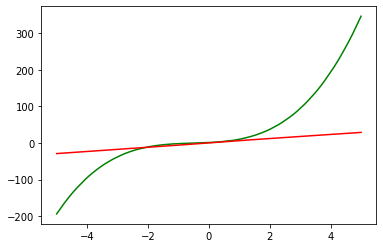

In [42]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 10)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[624369.25, 619819.9375, 615283.625, 610741.375, 606171.6875, 601552.875, 596863.875, 592086.875, 587206.9375, 582211.0, 577085.3125, 571818.4375, 566402.0, 560828.625, 555092.625, 549190.3125, 543119.5625, 536879.1875, 530468.75, 523888.875, 517141.34375, 510228.75, 503153.15625, 495917.25, 488524.25, 480978.25, 473283.875, 465446.34375, 457471.6875, 449366.3125, 441137.46875, 432792.90625, 424341.0, 415790.8125, 407151.9375, 398434.53125, 389649.375, 380807.6875, 371921.21875, 363002.40625, 354063.8125, 345118.59375, 336180.34375, 327262.75, 318380.0, 309546.375, 300776.34375, 292084.46875, 283485.40625, 274993.625, 266623.59375, 258389.640625, 250305.625, 242385.21875, 234641.640625, 227087.4375, 219734.625, 212594.59375, 205677.75, 198993.8125, 192551.375, 186358.09375, 180420.484375, 174743.921875, 169332.5625, 164189.28125, 159315.65625, 154712.078125, 150377.53125, 146309.78125, 142505.3125, 138959.453125, 135666.390625, 132619.203125, 129810.0859375, 127230.28125, 124870.28125,

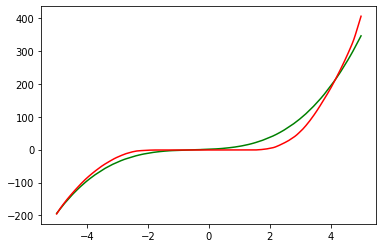

In [43]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[12537.173828125, 12221.5966796875, 11912.26171875, 11607.6103515625, 11305.94921875, 11005.91796875, 10706.33984375, 10406.1796875, 10104.623046875, 9800.9208984375, 9494.54296875, 9185.19921875, 8872.892578125, 8557.87890625, 8240.7216796875, 7922.1298828125, 7602.88623046875, 7283.90185546875, 6966.20751953125, 6650.9111328125, 6339.17431640625, 6032.1572265625, 5731.0546875, 5437.0888671875, 5151.4404296875, 4875.20458984375, 4609.37451171875, 4354.814453125, 4112.22509765625, 3882.123291015625, 3664.86328125, 3460.59326171875, 3269.26123046875, 3090.7021484375, 2924.6923828125, 2771.00927734375, 2629.47412109375, 2499.977294921875, 2382.48291015625, 2277.001220703125, 2183.5517578125, 2102.107666015625, 2032.5394287109375, 1974.5606689453125, 1927.6910400390625, 1891.230224609375, 1864.2589111328125, 1845.6563720703125, 1834.138671875, 1828.3155517578125, 1826.750244140625, 1828.03173828125, 1830.8355712890625, 1833.981689453125, 1836.475830078125, 1837.5386962890625, 1836.6154785

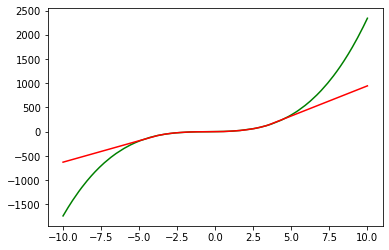

In [44]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np_polynomial, torch_func = torch_polynomial, model = nn.Sequential(nn.Linear(1, 200), nn.ReLU(), nn.Linear(200, 1)),
    learning_rate = 0.01, number_of_iterations = 1000)

In [45]:
def np_func3(x):
  return np.cos(2 * x) + np.sin(x)

def torch_func3(x):
  return torch.add(torch.cos(torch.mul(x, 2)), torch.sin(x))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.4622069597244263, 1533.765869140625, 95.4378662109375, 113.69739532470703, 372.5462646484375, 369.2152099609375, 223.12716674804688, 93.5534896850586, 27.53766441345215, 5.380368709564209, 4.161974906921387, 8.44970989227295, 10.142462730407715, 7.928854942321777, 4.336242198944092, 2.6518123149871826, 4.120148181915283, 7.054962158203125, 8.456108093261719, 7.132432460784912, 4.572563648223877, 2.9592819213867188, 3.47855281829834, 4.786117076873779, 4.9284348487854, 4.165431022644043, 3.3260223865509033, 2.7821900844573975, 2.5479962825775146, 2.4326555728912354, 2.238269329071045, 1.9097917079925537, 1.5045469999313354, 1.269995093345642, 1.3103936910629272, 1.2225675582885742, 0.9778578281402588, 0.7970150113105774, 0.7603003978729248, 0.7576395869255066, 0.6883272528648376, 0.5573992729187012, 0.46080681681632996, 0.4718116521835327, 0.5055732727050781, 0.4586174488067627, 0.3765701353549957, 0.3553647994995117, 0.3917112648487091, 0.404409259557724, 0.35736581683158875, 0.3111

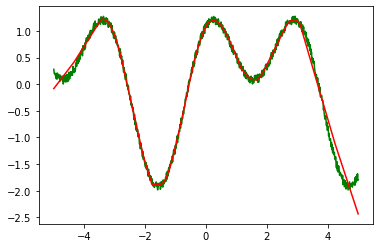

In [46]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([20, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.8541364669799805, 1580.719970703125, 97.46400451660156, 115.19486999511719, 378.7216491699219, 369.8941650390625, 219.91871643066406, 93.48759460449219, 29.151357650756836, 6.158005237579346, 1.0162253379821777, 2.4470269680023193, 4.1492133140563965, 4.112498760223389, 3.3494908809661865, 3.4695470333099365, 4.761908054351807, 6.1865644454956055, 6.752490043640137, 6.478621006011963, 6.064877510070801, 5.76899528503418, 5.330263614654541, 4.875310897827148, 4.673142910003662, 4.713006496429443, 4.532670021057129, 3.989884376525879, 3.249521255493164, 2.7370474338531494, 2.672206163406372, 2.6984446048736572, 2.3661949634552, 1.8749346733093262, 1.6006965637207031, 1.5205676555633545, 1.4157469272613525, 1.2366465330123901, 1.1206059455871582, 1.113155484199524, 1.0278444290161133, 0.8379080295562744, 0.7556032538414001, 0.8062750101089478, 0.8173474073410034, 0.7237945795059204, 0.6396757960319519, 0.6393787264823914, 0.633441150188446, 0.5873209238052368, 0.5689760446548462, 0.571

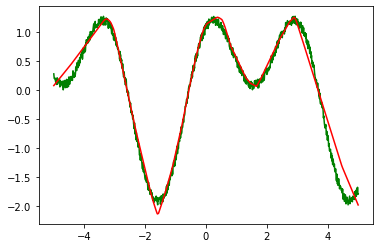

In [47]:
run(train_bound = 5, number_of_train_points = 20, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[3.026299476623535, 1.7101012468338013, 1.3811063766479492, 1.4350552558898926, 1.4421281814575195, 1.2125210762023926, 1.0008846521377563, 0.9647784233093262, 0.9970054626464844, 1.0465444326400757, 1.0656156539916992, 1.0436204671859741, 1.003791093826294, 0.9685577154159546, 0.956794261932373, 0.9489604830741882, 0.929815948009491, 0.8990219831466675, 0.8720456957817078, 0.8578878045082092, 0.8467398285865784, 0.8289455771446228, 0.8111129999160767, 0.7974942922592163, 0.7807847261428833, 0.7576155662536621, 0.7367107272148132, 0.7185368537902832, 0.693570077419281, 0.666291356086731, 0.6423631906509399, 0.6233275532722473, 0.6000958681106567, 0.5723167061805725, 0.5509486198425293, 0.5314857363700867, 0.5096479654312134, 0.4896378815174103, 0.46696820855140686, 0.4480138123035431, 0.4298309087753296, 0.40798404812812805, 0.39124828577041626, 0.37494248151779175, 0.3611403703689575, 0.3449760377407074, 0.33469247817993164, 0.3218934237957001, 0.3113589584827423, 0.3020192086696625, 

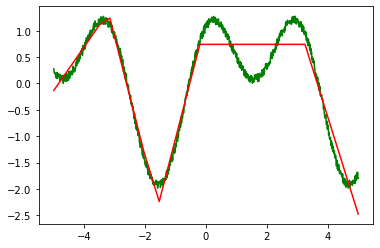

In [48]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 20), nn.ReLU(), nn.Linear(20, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.0619728565216064, 47.227691650390625, 1.2966710329055786, 6.532987117767334, 4.9883341789245605, 2.7130589485168457, 1.4283252954483032, 1.053721308708191, 1.1492938995361328, 1.1270560026168823, 0.9745160341262817, 0.942521870136261, 0.9975305795669556, 1.0322102308273315, 0.9932319521903992, 0.9346334934234619, 0.8966520428657532, 0.8778268694877625, 0.8557159304618835, 0.827086329460144, 0.7880646586418152, 0.7549161911010742, 0.7342455983161926, 0.6910578012466431, 0.6445830464363098, 0.623148500919342, 0.5677240490913391, 0.5502090454101562, 0.5040397644042969, 0.491936594247818, 0.44792649149894714, 0.42088279128074646, 0.3664391040802002, 0.3220946490764618, 0.3056009113788605, 0.255816787481308, 0.23532022535800934, 0.21284964680671692, 0.19174060225486755, 0.17730656266212463, 0.1568392664194107, 0.1384362429380417, 0.1312485933303833, 0.11994334310293198, 0.10994783043861389, 0.11170081049203873, 0.10508663952350616, 0.10466687381267548, 0.10215366631746292, 0.101894542574

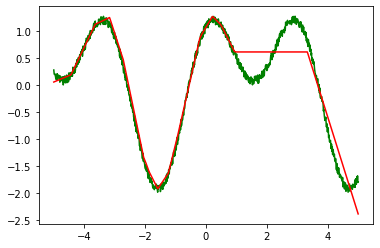

In [49]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 20), nn.ReLU(), nn.Linear(20, 100), nn.ReLU(), nn.Linear(100, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.720574140548706, 1398.02978515625, 72.04862213134766, 127.24241638183594, 332.8741760253906, 260.1437683105469, 94.92772674560547, 7.0116400718688965, 29.22211265563965, 99.13352966308594, 127.01483154296875, 100.2288818359375, 54.281776428222656, 18.87171173095703, 3.424859046936035, 4.343018054962158, 12.553119659423828, 18.72631072998047, 18.527650833129883, 12.858437538146973]


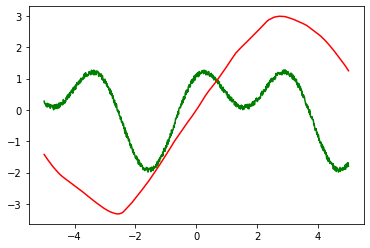

In [50]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 20)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([2000, 2000])) that is different to the input size (torch.Size([2000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[2.6912567615509033, 5404.13427734375, 238.77828979492188, 717.2344360351562, 1554.9747314453125, 1112.5223388671875, 384.94146728515625, 84.41291809082031, 253.65957641601562, 502.8758850097656, 536.5775756835938, 379.4451599121094, 189.47825622558594, 69.97030639648438, 34.615379333496094, 47.972877502441406, 65.3357925415039, 66.63055419921875, 51.06572341918945, 30.995405197143555, 20.409635543823242, 24.287057876586914, 32.27174377441406, 33.722503662109375, 27.86712646484375, 19.144187927246094, 11.901246070861816, 8.608482360839844, 9.11316967010498, 11.386289596557617, 12.80265998840332, 11.847238540649414, 8.945846557617188, 5.737050533294678, 3.819133758544922, 3.7939398288726807, 5.033955097198486, 6.244281768798828, 6.361221790313721, 5.22797966003418, 3.5331544876098633, 2.243284225463867, 1.9713422060012817, 2.619730234146118, 3.4926538467407227, 3.8058221340179443, 3.2588531970977783, 2.222728967666626, 1.3708174228668213, 1.1472922563552856, 1.5081113576889038, 2.054485

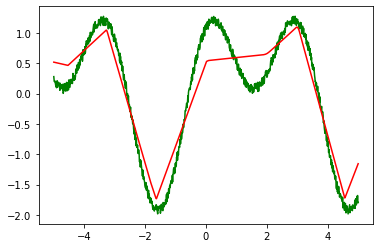

In [51]:
run(train_bound = 10, number_of_train_points = 2000, test_bound = 5, number_of_test_points = 1000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1.3506850004196167, 1573.3167724609375, 91.58284759521484, 132.9292755126953, 404.7660827636719, 380.4609375, 222.2005157470703, 93.87832641601562, 29.89626121520996, 7.696844100952148, 2.4635424613952637, 2.2182998657226562, 2.6762914657592773, 2.5951504707336426, 2.2210185527801514, 2.293102502822876, 3.108828544616699, 3.9769208431243896, 4.067897319793701, 3.4736642837524414, 3.1296041011810303, 3.6170589923858643, 4.058563232421875, 3.650059938430786, 2.983755588531494, 2.7893013954162598, 2.911259174346924, 2.775005578994751, 2.2948503494262695, 1.866234540939331, 1.750908613204956, 1.7267242670059204, 1.5109384059906006, 1.2104228734970093, 1.0808287858963013, 1.1145597696304321, 1.0916049480438232, 0.9399522542953491, 0.8092299103736877, 0.8143823742866516, 0.8571686148643494, 0.8075889945030212, 0.7214319109916687, 0.7125887870788574, 0.7515804767608643, 0.7379802465438843, 0.6738304495811462, 0.6467987298965454, 0.6700559854507446, 0.6662455201148987, 0.6167474389076233, 0.5

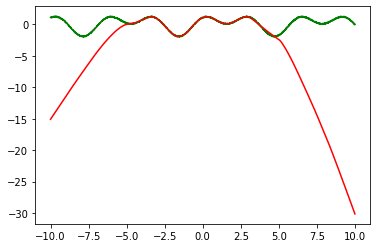

In [52]:
run(train_bound = 5, number_of_train_points = 1000, test_bound = 10, number_of_test_points = 2000,
    np_func = np_func3, torch_func = torch_func3, model = nn.Sequential(nn.Linear(1, 500), nn.ReLU(), nn.Linear(500, 1)),
    learning_rate = 0.1, number_of_iterations = 1000)